In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
num_imgs = 50000

img_size = 8
min_object_size = 1
max_object_size = 4
num_objects = 1

bboxes = np.zeros((num_imgs, num_objects, 4))
imgs = np.zeros((num_imgs, img_size, img_size))  # set background to 0

for i_img in range(num_imgs):
    for i_object in range(num_objects):
        w, h = np.random.randint(min_object_size, max_object_size, size=2)
        x = np.random.randint(0, img_size - w)
        y = np.random.randint(0, img_size - h)
        imgs[i_img, x:x+w, y:y+h] = 1.  # set rectangle to 1
        bboxes[i_img, i_object] = [x, y, w, h]
        
imgs.shape, bboxes.shape

((50000, 8, 8), (50000, 1, 4))

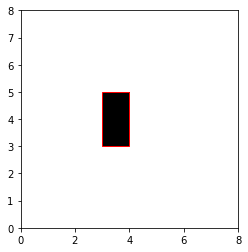

In [5]:
i = 0
plt.imshow(imgs[i].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
for bbox in bboxes[i]:
    plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], ec='r', fc='none'))

In [0]:
X=(imgs-np.mean(imgs.flatten()))/np.std(imgs.flatten())

In [21]:
bboxes.shape

(50000, 1, 4)

In [7]:
y = bboxes.reshape(num_imgs, -1) / img_size
y.shape, np.mean(y), np.std(y)

((50000, 4), 0.281565625, 0.1752037262542078)

In [22]:
y.shape

(50000, 4)

In [0]:
i = int(0.8 * num_imgs)
train_X = X[:i]
train_X=np.reshape(train_X,(np.size(train_X,0),np.size(train_X,1),np.size(train_X,2),1))
test_X = X[i:]
test_X=np.reshape(test_X,(np.size(test_X,0),np.size(test_X,1),np.size(test_X,2),1))

train_y = y[:i]
test_y = y[i:]
test_imgs = imgs[i:]
test_bboxes = bboxes[i:]

In [9]:
np.shape(train_X)

(40000, 8, 8, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, MaxPooling2D, Flatten

# Activate GPU for this, otherwise the convnet will take forever to train with Theano.

# TODO: Make one run with very deep network (~10 layers).
filter_size = 3
pool_size = 2

# TODO: Maybe remove pooling bc it takes away the spatial information.

model = Sequential()
model.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1),padding="same",
                 activation='relu',
                 input_shape=(8,8,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Convolution2D(64, (5, 5),strides=(1, 1),padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4))

model.compile('adadelta', 'mse')

In [11]:
model.fit(train_X, train_y, nb_epoch=30, validation_data=(test_X, test_y), verbose=2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0831 07:23:47.111471 140473413003136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0831 07:23:47.119771 140473413003136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 40000 samples, validate on 10000 samples
Epoch 1/30
 - 9s - loss: 0.0016 - val_loss: 2.8501e-04
Epoch 2/30
 - 5s - loss: 1.2490e-04 - val_loss: 4.0461e-05
Epoch 3/30
 - 5s - loss: 5.1127e-05 - val_loss: 2.4640e-05
Epoch 4/30
 - 5s - loss: 3.3695e-05 - val_loss: 3.0868e-05
Epoch 5/30
 - 5s - loss: 2.0373e-05 - val_loss: 2.0620e-06
Epoch 6/30
 - 5s - loss: 1.2958e-05 - val_loss: 7.8083e-06
Epoch 7/30
 - 5s - loss: 1.1704e-05 - val_loss: 2.0313e-05
Epoch 8/30
 - 5s - loss: 6.7059e-06 - val_loss: 2.7564e-06
Epoch 9/30
 - 5s - loss: 6.3138e-06 - val_loss: 8.1656e-07
Epoch 10/30
 - 5s - loss: 3.7504e-06 - val_loss: 1.3764e-06
Epoch 11/30
 - 5s - loss: 3.5641e-06 - val_loss: 2.2411e-06
Epoch 12/30
 - 5s - loss: 3.3712e-06 - val_loss: 1.6519e-06
Epoch 13/30
 - 5s - loss: 1.8414e-06 - val_loss: 3.2102e-06
Epoch 14/30
 - 5s - loss: 2.0310e-06 - val_loss: 1.4609e-06
Epoch 15/30
 - 5s - loss: 1.2649e-06 - val_loss: 1.9936e-07
Epoch 16/30
 - 5s - loss: 1.1395e-06 - val_loss: 2.6797e-06
Epo

In [12]:
pred_y = model.predict(test_X)
pred_bboxes = pred_y * img_size
pred_bboxes = pred_bboxes.reshape(len(pred_bboxes), num_objects, -1)
pred_bboxes.shape

(10000, 1, 4)

In [16]:
np.shape(test_y)

(10000, 4)

In [14]:
pred_bboxes

array([[[ 4.9968805e+00, -1.6852021e-03,  2.0006409e+00,  9.9985260e-01]],

       [[ 9.9861026e-01,  9.9773526e-01,  1.0002809e+00,  1.9984548e+00]],

       [[ 2.9982584e+00,  3.9986641e+00,  2.9997025e+00,  2.9981670e+00]],

       ...,

       [[ 3.9976187e+00,  1.9994311e+00,  3.0001597e+00,  2.9989576e+00]],

       [[-1.4929771e-03,  1.9963152e+00,  2.0006077e+00,  2.9978449e+00]],

       [[ 2.9981117e+00,  9.9779558e-01,  3.0005531e+00,  1.9986668e+00]]],
      dtype=float32)

In [15]:
test_y

array([[0.625, 0.   , 0.25 , 0.125],
       [0.125, 0.125, 0.125, 0.25 ],
       [0.375, 0.5  , 0.375, 0.375],
       ...,
       [0.5  , 0.25 , 0.375, 0.375],
       [0.   , 0.25 , 0.25 , 0.375],
       [0.375, 0.125, 0.375, 0.25 ]])

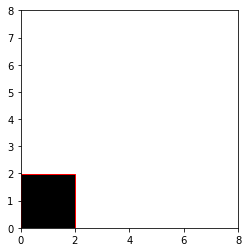

In [27]:
i=5
plt.imshow(test_imgs[i].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
#plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], ec='r', fc='none'))
plt.gca().add_patch(matplotlib.patches.Rectangle((pred_bboxes[i][0][0], pred_bboxes[i][0][1]), pred_bboxes[i][0][2], pred_bboxes[i][0][3], ec='r', fc='none'))
#plt.gca().add_patch(matplotlib.patches.Rectangle((test_y[0][0]*img_size, test_y[0][1]*img_size), test_y[0][2]*img_size, test_y[0][3]*img_size, ec='r', fc='none'))